# CatBoost

## Importing the libraries

In [7]:
#!pip install catboost

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv('Cancer_Tumor_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training CatBoost on the Training set

In [11]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.007956
0:	learn: 0.6778283	total: 146ms	remaining: 2m 25s
1:	learn: 0.6642874	total: 147ms	remaining: 1m 13s
2:	learn: 0.6510578	total: 148ms	remaining: 49.3s
3:	learn: 0.6351685	total: 150ms	remaining: 37.3s
4:	learn: 0.6203906	total: 151ms	remaining: 30s
5:	learn: 0.6053561	total: 152ms	remaining: 25.2s
6:	learn: 0.5913363	total: 153ms	remaining: 21.7s
7:	learn: 0.5773888	total: 154ms	remaining: 19.1s
8:	learn: 0.5638394	total: 155ms	remaining: 17.1s
9:	learn: 0.5507421	total: 156ms	remaining: 15.4s
10:	learn: 0.5377201	total: 157ms	remaining: 14.1s
11:	learn: 0.5243873	total: 158ms	remaining: 13s
12:	learn: 0.5129034	total: 159ms	remaining: 12.1s
13:	learn: 0.5047204	total: 160ms	remaining: 11.3s
14:	learn: 0.4942404	total: 161ms	remaining: 10.6s
15:	learn: 0.4836253	total: 163ms	remaining: 9.99s
16:	learn: 0.4733355	total: 164ms	remaining: 9.47s
17:	learn: 0.4629416	total: 165ms	remaining: 9s
18:	learn: 0.4527778	total: 166ms	remaining: 8.59s
19:	learn: 0.442

## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 0 50]]


0.9781021897810219

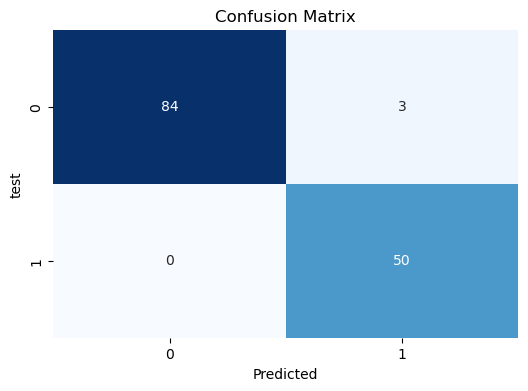

In [14]:
#plotting confution matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("test")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

## Applying k-Fold Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Learning rate set to 0.007604
0:	learn: 0.6772057	total: 1.3ms	remaining: 1.3s
1:	learn: 0.6652633	total: 2.48ms	remaining: 1.24s
2:	learn: 0.6511784	total: 3.58ms	remaining: 1.19s
3:	learn: 0.6360094	total: 4.85ms	remaining: 1.21s
4:	learn: 0.6221218	total: 6.18ms	remaining: 1.23s
5:	learn: 0.6065689	total: 7.47ms	remaining: 1.24s
6:	learn: 0.5931935	total: 8.78ms	remaining: 1.25s
7:	learn: 0.5783827	total: 9.98ms	remaining: 1.24s
8:	learn: 0.5646398	total: 11.3ms	remaining: 1.24s
9:	learn: 0.5508871	total: 12.5ms	remaining: 1.24s
10:	learn: 0.5390346	total: 13.8ms	remaining: 1.24s
11:	learn: 0.5279564	total: 15.2ms	remaining: 1.25s
12:	learn: 0.5181720	total: 16.6ms	remaining: 1.26s
13:	learn: 0.5055409	total: 17.7ms	remaining: 1.25s
14:	learn: 0.4943123	total: 19ms	remaining: 1.25s
15:	learn: 0.4824866	total: 20.3ms	remaining: 1.25s
16:	learn: 0.4729889	total: 21.9ms	remaining: 1.26s
17:	learn: 0.4638986	total: 23.1ms	remaining: 1.26s
18:	learn: 0.4549171	total: 24.2ms	remaining: 1.

In [16]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.26 %
Standard Deviation: 2.03 %
